In [1]:
from matplotlib import pyplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import statsmodels.api as sm
from sklearn import metrics
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import  OneHotEncoder
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance
#import optuna
import xgboost as xgb
import lightgbm as lgb
#import catboost as cat

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:


Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.




In [2]:
#data = pd.read_csv('data_final.csv')
url = 'https://raw.githubusercontent.com/dhruvkdesai3/scorecard_trial1/refs/heads/main/data_final.csv'
data = pd.read_csv(url)

In [3]:
data.head(15)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,25,72000,MORTGAGE,NaN,HOMEIMPROVEMENT,A,2000,7.66,0,0.03,N,4
1,26,32000,RENT,4.0,DEBTCONSOLIDATION,A,12250,NaN,1,0.38,N,2
2,25,34000,MORTGAGE,2.0,HOMEIMPROVEMENT,C,5800,13.48,1,0.17,Y,3
3,25,118000,MORTGAGE,8.0,HOMEIMPROVEMENT,A,15000,7.88,0,0.13,N,4
4,22,96000,MORTGAGE,6.0,EDUCATION,C,6000,13.49,0,0.06,N,3
5,44,25209,RENT,6.0,MEDICAL,C,2000,NaN,0,0.08,Y,13
6,26,116004,MORTGAGE,11.0,VENTURE,B,20000,12.21,0,0.17,N,2
7,22,47484,MORTGAGE,0.0,EDUCATION,B,5325,10.62,0,0.11,N,4
8,22,60000,MORTGAGE,6.0,PERSONAL,A,10000,8.90,0,0.17,N,4
9,34,70000,MORTGAGE,16.0,PERSONAL,A,4000,7.74,0,0.06,N,5


In [4]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,19881.000000,1.988100e+04,19335.000000,19881.000000,17971.000000,19881.000000,19881.000000,19881.000000
mean,27.710025,6.623181e+04,4.784432,9600.399879,11.016532,0.217796,0.170032,5.790755
std,6.332000,6.728205e+04,4.047749,6339.463522,3.245504,0.412758,0.107037,4.048260
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.860400e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.900000e+04,7.000000,12250.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19881 entries, 0 to 19880
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  19881 non-null  int64  
 1   person_income               19881 non-null  int64  
 2   person_home_ownership       19881 non-null  object 
 3   person_emp_length           19335 non-null  float64
 4   loan_intent                 19881 non-null  object 
 5   loan_grade                  19881 non-null  object 
 6   loan_amnt                   19881 non-null  int64  
 7   loan_int_rate               17971 non-null  float64
 8   loan_status                 19881 non-null  int64  
 9   loan_percent_income         19881 non-null  float64
 10  cb_person_default_on_file   19881 non-null  object 
 11  cb_person_cred_hist_length  19881 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 1.8+ MB


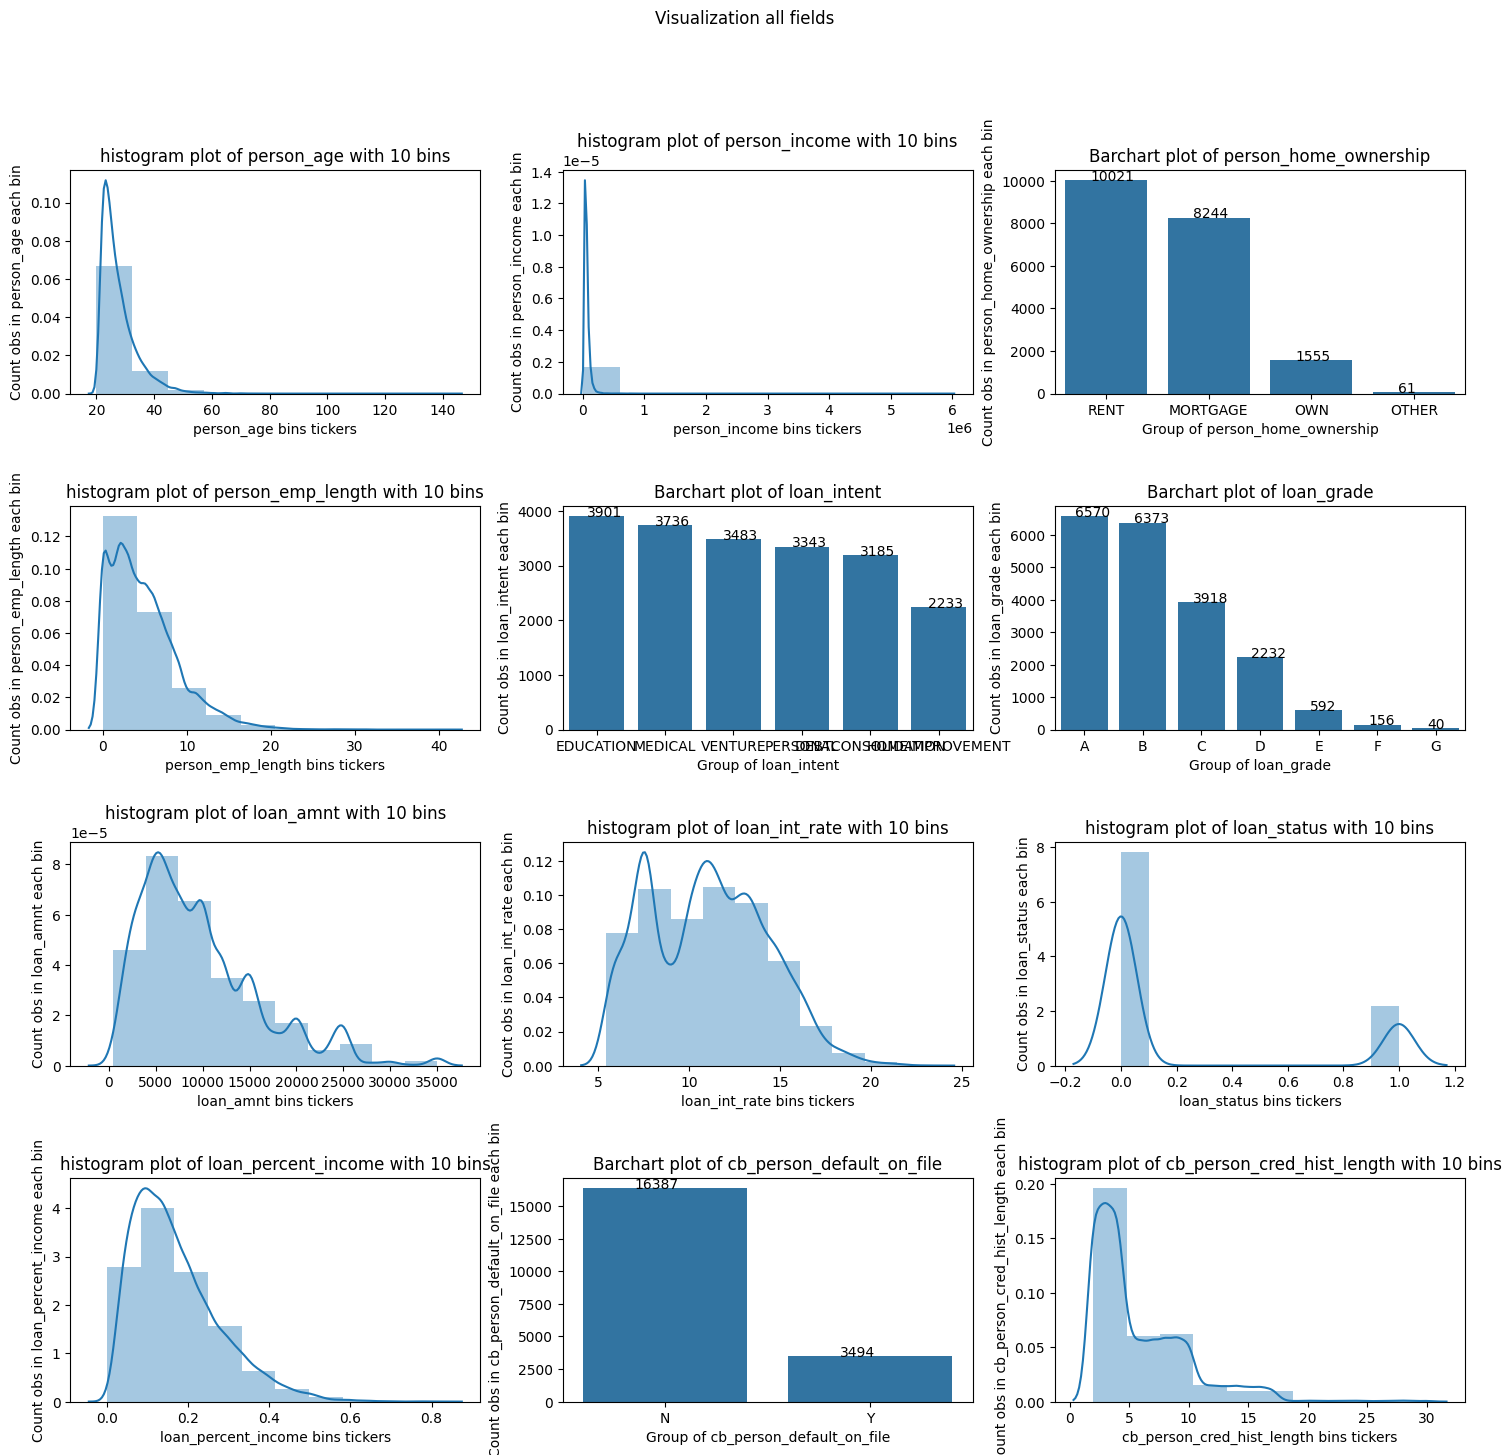

In [6]:
def _plot_hist_subplot(x, fieldname, bins = 10, use_kde = True):
    x = x.dropna()
    xlabel = '{} bins tickers'.format(fieldname)
    ylabel = 'Count obs in {} each bin'.format(fieldname)
    title = 'histogram plot of {} with {} bins'.format(fieldname, bins)
    ax = sns.distplot(x, bins = bins, kde = use_kde)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    return ax

#  barchart
def _plot_barchart_subplot(x, fieldname):
    xlabel = 'Group of {}'.format(fieldname)
    ylabel = 'Count obs in {} each bin'.format(fieldname)
    title = 'Barchart plot of {}'.format(fieldname)
    x = x.fillna('Missing')
    df_summary = x.value_counts(dropna = False)
    y_values = df_summary.values
    x_index = df_summary.index
    ax = sns.barplot(x = x_index, y = y_values, order = x_index)

    labels = list(set(x))
    for label, p in zip(y_values, ax.patches):
        ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.15))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    return ax


fig = plt.figure(figsize=(18, 16))
fig.subplots_adjust(hspace=0.5, wspace=0.2)

for i, (fieldname, dtype) in enumerate(zip(data.columns, data.dtypes.values)):
    if i <= 11:
        ax_i = fig.add_subplot(4, 3, i+1)
        if dtype in ['float64', 'int64']:
            ax_i = _plot_hist_subplot(data[fieldname], fieldname=fieldname)
        else:
            ax_i = _plot_barchart_subplot(data[fieldname], fieldname=fieldname)
fig.suptitle('Visualization all fields')
plt.show()

In [7]:
#ex.pie(data,names='loan_status',title='Propotion Of Loan Status',hole=0.33)

In [8]:
#sns.countplot(data["loan_status"], palette='CMRmap')
#plt.title("Loan Status",fontsize=10)
#plt.show()

In [9]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

missing_zero_values_table(data)

Your selected dataframe has 12 columns and 19881 Rows.
There are 2 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
loan_int_rate,0,1910,9.6,1910,9.6,float64
person_emp_length,2532,546,2.7,3078,15.5,float64


In [10]:
columns_num = data.select_dtypes(['float', 'int']).columns
data[columns_num] = data[columns_num].apply(lambda x: x.fillna(x.mean()), axis=0)
columns_obj = data.select_dtypes(['object']).columns
data[columns_obj] = data[columns_obj].apply(lambda x: x.fillna('Missing'), axis=0)

In [11]:
missing_zero_values_table(data)

Your selected dataframe has 12 columns and 19881 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


In [12]:
MAX_VAL = 999999999
MIN_VAL = -MAX_VAL

In [13]:
X = data[["loan_percent_income", 'loan_status']]


In [14]:
X

,loan_percent_income,loan_status
0,0.03,0
1,0.38,1
2,0.17,1
3,0.13,0
4,0.06,0
...,...,...
19876,0.14,1
19877,0.14,1
19878,0.14,0
19879,0.04,0


In [15]:
X = X.sort_values("loan_percent_income")
X

,loan_percent_income,loan_status
1281,0.00,0
12817,0.00,0
5469,0.00,0
17469,0.00,0
4588,0.00,0
...,...,...
4410,0.71,1
17653,0.77,1
6486,0.77,1
14680,0.78,1


In [16]:
coltype = X["loan_percent_income"].dtype
coltype

dtype('float64')

In [17]:
bins, thres = pd.qcut(X["loan_percent_income"], q = 5, retbins=True)

In [18]:
bins

,loan_percent_income
1281,"(-0.001, 0.08]"
12817,"(-0.001, 0.08]"
5469,"(-0.001, 0.08]"
17469,"(-0.001, 0.08]"
4588,"(-0.001, 0.08]"
...,...
4410,"(0.25, 0.83]"
17653,"(0.25, 0.83]"
6486,"(0.25, 0.83]"
14680,"(0.25, 0.83]"


In [19]:
thres

array([0.  , 0.08, 0.12, 0.17, 0.25, 0.83])

In [20]:
thres[0] = MIN_VAL
thres[-1] = MAX_VAL


In [21]:
bins, thres = pd.cut(X["loan_percent_income"], bins=thres, retbins=True)

In [22]:
bins

,loan_percent_income
1281,"(-999999999.0, 0.08]"
12817,"(-999999999.0, 0.08]"
5469,"(-999999999.0, 0.08]"
17469,"(-999999999.0, 0.08]"
4588,"(-999999999.0, 0.08]"
...,...
4410,"(0.25, 999999999.0]"
17653,"(0.25, 999999999.0]"
6486,"(0.25, 999999999.0]"
14680,"(0.25, 999999999.0]"


In [23]:
thres

array([-9.99999999e+08,  8.00000000e-02,  1.20000000e-01,  1.70000000e-01,
        2.50000000e-01,  9.99999999e+08])

In [24]:
X['bins'] = bins

In [25]:
X

,loan_percent_income,loan_status,bins
1281,0.00,0,"(-999999999.0, 0.08]"
12817,0.00,0,"(-999999999.0, 0.08]"
5469,0.00,0,"(-999999999.0, 0.08]"
17469,0.00,0,"(-999999999.0, 0.08]"
4588,0.00,0,"(-999999999.0, 0.08]"
...,...,...,...
4410,0.71,1,"(0.25, 999999999.0]"
17653,0.77,1,"(0.25, 999999999.0]"
6486,0.77,1,"(0.25, 999999999.0]"
14680,0.78,1,"(0.25, 999999999.0]"


In [26]:
df_GB=pd.pivot_table(X,
                index = ['bins'],
                values = ['loan_status'],
                columns = ['loan_status'],
                aggfunc = {
                    'loan_status':np.size
                })
df_GB

loan_status      
loan_status                    0     1
bins                                  
(-999999999.0, 0.08]        4073   532
(0.08, 0.12]                3013   430
(0.12, 0.17]                3387   576
(0.17, 0.25]                3289   762
(0.25, 999999999.0]         1789  2030

In [27]:
df_Count=pd.pivot_table(X,
                index = ['bins'],
                values = ['loan_status'],
                aggfunc = {
                    'loan_status': np.size
                })
df_Count

,loan_status
bins,
"(-999999999.0, 0.08]",4605
"(0.08, 0.12]",3443
"(0.12, 0.17]",3963
"(0.17, 0.25]",4051
"(0.25, 999999999.0]",3819


In [28]:
df_Thres =pd.DataFrame({'Thres':thres[1:]}, index=df_GB.index)

In [29]:
df_Count.columns = ['No_Obs']
df_Count

,No_Obs
bins,
"(-999999999.0, 0.08]",4605
"(0.08, 0.12]",3443
"(0.12, 0.17]",3963
"(0.17, 0.25]",4051
"(0.25, 999999999.0]",3819


In [30]:
df_GB.columns = ['#BAD', '#GOOD']
df_GB

,#BAD,#GOOD
bins,,
"(-999999999.0, 0.08]",4073,532
"(0.08, 0.12]",3013,430
"(0.12, 0.17]",3387,576
"(0.17, 0.25]",3289,762
"(0.25, 999999999.0]",1789,2030


In [31]:
df_summary = df_Thres.join(df_Count).join(df_GB)
df_summary

,Thres,No_Obs,#BAD,#GOOD
bins,,,,
"(-999999999.0, 0.08]",8.000000e-02,4605,4073,532
"(0.08, 0.12]",1.200000e-01,3443,3013,430
"(0.12, 0.17]",1.700000e-01,3963,3387,576
"(0.17, 0.25]",2.500000e-01,4051,3289,762
"(0.25, 999999999.0]",1.000000e+09,3819,1789,2030


In [32]:
import numpy as np
import matplotlib.pyplot as plt

MAX_VAL = 999999999
MIN_VAL = -MAX_VAL

def _bin_table(data, colname, n_bins = 10, qcut = None):
  X = data[[colname, 'loan_status']]
  X = X.sort_values(colname)
  coltype = X[colname].dtype

  if coltype in ['float', 'int']:
    if qcut is None:
      try:
        bins, thres = pd.qcut(X[colname], q = n_bins, retbins=True)
        # Thay thế threshold đầu và cuối của thres
        thres[0] = MIN_VAL
        thres[-1] = MAX_VAL
        bins, thres = pd.cut(X[colname], bins=thres, retbins=True)
        X['bins'] = bins
      except:
        print('n_bins must be lower to bin interval is valid!')
    else:
      bins, thres = pd.cut(X[colname], bins=qcut, retbins=True)
      X['bins'] = bins
  elif coltype == 'object':
    X['bins'] = X[colname]

  df_GB = pd.pivot_table(X,
                index = ['bins'],
                values = ['loan_status'],
                columns = ['loan_status'],
                aggfunc = {
                    'loan_status':np.size
                })

  df_Count = pd.pivot_table(X,
                index = ['bins'],
                values = ['loan_status'],
                aggfunc = {
                    'loan_status': np.size
                })

  if coltype in ['float', 'int']:
    df_Thres = pd.DataFrame({'Thres':thres[1:]}, index=df_GB.index)
  elif coltype == 'object':
    df_Thres = pd.DataFrame(index=df_GB.index)
    thres = None
  df_Count.columns = ['No_Obs']
  df_GB.columns = ['#BAD', '#GOOD']
  df_summary = df_Thres.join(df_Count).join(df_GB)
  return df_summary, thres

In [33]:
df_summary, thres = _bin_table(data, 'loan_percent_income', n_bins=5)
df_summary

,Thres,No_Obs,#BAD,#GOOD
bins,,,,
"(-999999999.0, 0.08]",8.000000e-02,4605,4073,532
"(0.08, 0.12]",1.200000e-01,3443,3013,430
"(0.12, 0.17]",1.700000e-01,3963,3387,576
"(0.17, 0.25]",2.500000e-01,4051,3289,762
"(0.25, 999999999.0]",1.000000e+09,3819,1789,2030


In [34]:
df_summary

,Thres,No_Obs,#BAD,#GOOD
bins,,,,
"(-999999999.0, 0.08]",8.000000e-02,4605,4073,532
"(0.08, 0.12]",1.200000e-01,3443,3013,430
"(0.12, 0.17]",1.700000e-01,3963,3387,576
"(0.17, 0.25]",2.500000e-01,4051,3289,762
"(0.25, 999999999.0]",1.000000e+09,3819,1789,2030


In [35]:
df_summary['#BAD'].replace({0:1})

,#BAD
bins,
"(-999999999.0, 0.08]",4073
"(0.08, 0.12]",3013
"(0.12, 0.17]",3387
"(0.17, 0.25]",3289
"(0.25, 999999999.0]",1789


In [36]:
def _WOE(data, colname, n_bins = None, min_obs = 100, qcut = None):

  df_summary, thres = _bin_table(data, colname, n_bins = n_bins, qcut = qcut)

  df_summary['#BAD'] = df_summary['#BAD'].replace({0:1})

  if qcut is not None:

    exclude_ind = np.where(df_summary['No_Obs'] <= min_obs)[0]
    if exclude_ind.shape[0] > 0:
      new_thres = np.delete(thres, exclude_ind)
      print('Auto combine {} bins into {} bins'.format(n_bins, new_thres.shape[0]-1))

      df_summary, thres = _bin_table(data, colname, qcut=new_thres)

  new_thres = thres
  df_summary['GOOD/BAD'] = df_summary['#GOOD']/df_summary['#BAD']
  df_summary['%BAD'] = df_summary['#BAD']/df_summary['#BAD'].sum()
  df_summary['%GOOD'] = df_summary['#GOOD']/df_summary['#GOOD'].sum()
  df_summary['WOE'] = np.log(df_summary['%GOOD']/df_summary['%BAD'])
  df_summary['IV'] = (df_summary['%GOOD']-df_summary['%BAD'])*df_summary['WOE']
  df_summary['COLUMN'] = colname
  IV = df_summary['IV'].sum()
  print('Information Value of {} column: {}'.format(colname, IV))
  return df_summary, IV, new_thres

df_summary, IV, thres = _WOE(data, 'loan_percent_income', n_bins = 7, min_obs= 100)
df_summary

Information Value of loan_percent_income column: 0.8814234539254481


,Thres,No_Obs,#BAD,#GOOD,GOOD/BAD,%BAD,%GOOD,WOE,IV,COLUMN
bins,,,,,,,,,,
"(-999999999.0, 0.06]",6.000000e-02,2895,2599,296,0.113890,0.167128,0.068360,-0.893965,0.088294,loan_percent_income
"(0.06, 0.1]",1.000000e-01,3530,3059,471,0.153972,0.196708,0.108776,-0.592428,0.052093,loan_percent_income
"(0.1, 0.13]",1.300000e-01,2530,2228,302,0.135548,0.143271,0.069746,-0.719875,0.052929,loan_percent_income
"(0.13, 0.17]",1.700000e-01,3056,2587,469,0.181291,0.166356,0.108314,-0.429094,0.024905,loan_percent_income
"(0.17, 0.21]",2.100000e-01,2304,1890,414,0.219048,0.121536,0.095612,-0.239909,0.006219,loan_percent_income
"(0.21, 0.29]",2.900000e-01,2941,2288,653,0.285402,0.147129,0.150808,0.024701,0.000091,loan_percent_income
"(0.29, 999999999.0]",1.000000e+09,2625,900,1725,1.916667,0.057874,0.398383,1.929145,0.656892,loan_percent_income


In [37]:
df_summary

,Thres,No_Obs,#BAD,#GOOD,GOOD/BAD,%BAD,%GOOD,WOE,IV,COLUMN
bins,,,,,,,,,,
"(-999999999.0, 0.06]",6.000000e-02,2895,2599,296,0.113890,0.167128,0.068360,-0.893965,0.088294,loan_percent_income
"(0.06, 0.1]",1.000000e-01,3530,3059,471,0.153972,0.196708,0.108776,-0.592428,0.052093,loan_percent_income
"(0.1, 0.13]",1.300000e-01,2530,2228,302,0.135548,0.143271,0.069746,-0.719875,0.052929,loan_percent_income
"(0.13, 0.17]",1.700000e-01,3056,2587,469,0.181291,0.166356,0.108314,-0.429094,0.024905,loan_percent_income
"(0.17, 0.21]",2.100000e-01,2304,1890,414,0.219048,0.121536,0.095612,-0.239909,0.006219,loan_percent_income
"(0.21, 0.29]",2.900000e-01,2941,2288,653,0.285402,0.147129,0.150808,0.024701,0.000091,loan_percent_income
"(0.29, 999999999.0]",1.000000e+09,2625,900,1725,1.916667,0.057874,0.398383,1.929145,0.656892,loan_percent_income


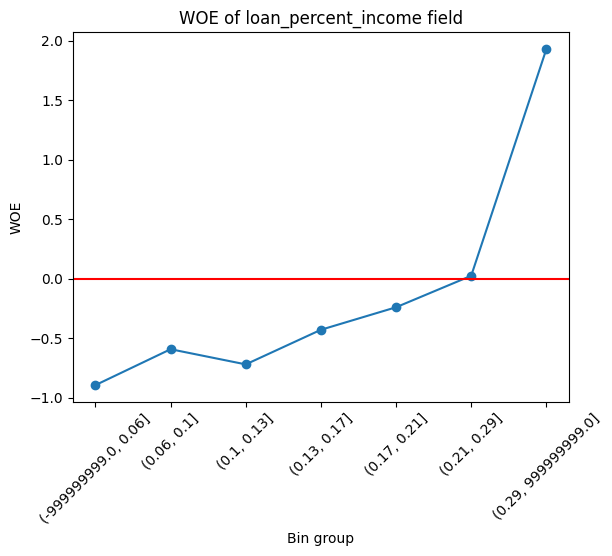

In [38]:
def _plot(df_summary):
    colname = list(df_summary['COLUMN'].unique())[0]
    df_summary['WOE'].plot(linestyle='-', marker='o')
    plt.title('WOE of {} field'.format(colname))
    plt.axhline(y=0, color = 'red')
    plt.xticks(rotation=45)
    plt.ylabel('WOE')
    plt.xlabel('Bin group')

_plot(df_summary)

In [39]:
WOE_dict=dict()
nbins = {'person_age': 10, 'person_income': 10, 'person_emp_length': 5, 'loan_amnt':10, 'loan_int_rate':10, 'cb_person_cred_hist_length': 5, 'loan_percent_income':10}
for (col, bins) in nbins.items():
    df_summary, IV, thres = _WOE(data, colname=col, n_bins=bins)
    WOE_dict[col] = {'table':df_summary, 'IV':IV}

Information Value of person_age column: 0.017560813711781354
Information Value of person_income column: 0.4827249034688532
Information Value of person_emp_length column: 0.0468335476752727
Information Value of loan_amnt column: 0.08505991048842812
Information Value of loan_int_rate column: 0.6489219359673384
Information Value of cb_person_cred_hist_length column: 0.00529779175767272
Information Value of loan_percent_income column: 0.8794480283574145


In [40]:
for col in ['person_home_ownership', 'loan_intent','loan_grade',
           'cb_person_default_on_file']:
    df_summary, IV, thres = _WOE(data, colname=col)
    WOE_dict[col] = {'table':df_summary, 'IV':IV}

Information Value of person_home_ownership column: 0.38388310123715347
Information Value of loan_intent column: 0.09896966582526268
Information Value of loan_grade column: 0.8758727476776351
Information Value of cb_person_default_on_file column: 0.17409066245127763


In [41]:
columns = []
IVs = []
for col in data.columns:
    if col != 'loan_status':
        columns.append(col)
        IVs.append(WOE_dict[col]['IV'])
df_WOE = pd.DataFrame({'column': columns, 'IV': IVs})



In [42]:
df_WOE

,column,IV
0,person_age,0.017561
1,person_income,0.482725
2,person_home_ownership,0.383883
3,person_emp_length,0.046834
4,loan_intent,0.098970
5,loan_grade,0.875873
6,loan_amnt,0.085060
7,loan_int_rate,0.648922
8,loan_percent_income,0.879448
9,cb_person_default_on_file,0.174091


In [43]:
def _rank_IV(iv):
      if iv <= 0.02:
        return 'Useless'
      elif iv <= 0.1:
        return 'Weak'
      elif iv <= 0.3:
        return 'Medium'
      elif iv <= 0.5:
        return 'Strong'
      else:
        return 'suspicious'

df_WOE['rank']=df_WOE['IV'].apply(lambda x: _rank_IV(x))
df_WOE.sort_values('IV', ascending=False)

,column,IV,rank
8,loan_percent_income,0.879448,suspicious
5,loan_grade,0.875873,suspicious
7,loan_int_rate,0.648922,suspicious
1,person_income,0.482725,Strong
2,person_home_ownership,0.383883,Strong
9,cb_person_default_on_file,0.174091,Medium
4,loan_intent,0.098970,Weak
6,loan_amnt,0.085060,Weak
3,person_emp_length,0.046834,Weak
0,person_age,0.017561,Useless


In [44]:
WOE_dict

{'person_age': {'table':                             Thres  No_Obs  #BAD  #GOOD  GOOD/BAD      %BAD  \
  bins                                                                         
  (-999999999.0, 22.0]         22.0    3016  2209    807  0.365324  0.142049   
  (22.0, 23.0]                 23.0    2357  1851    506  0.273366  0.119028   
  (23.0, 24.0]                 24.0    2163  1679    484  0.288267  0.107967   
  (24.0, 25.0]                 25.0    1866  1460    406  0.278082  0.093885   
  (25.0, 26.0]                 26.0    1518  1223    295  0.241210  0.078644   
  (26.0, 27.0]                 27.0    1313  1034    279  0.269826  0.066491   
  (27.0, 29.0]                 29.0    2166  1708    458  0.268150  0.109832   
  (29.0, 32.0]                 32.0    2086  1680    406  0.241667  0.108032   
  (32.0, 36.0]                 36.0    1606  1291    315  0.243997  0.083017   
  (36.0, 999999999.0]   999999999.0    1790  1416    374  0.264124  0.091055   
  
              

In [45]:
for col in WOE_dict.keys():
    try:
        key = list(WOE_dict[col]['table']['WOE'].index)
        woe = list(WOE_dict[col]['table']['WOE'])
        d = dict(zip(key, woe))
        col_woe = col+'_WOE'
        data[col_woe] = data[col].map(d)
    except:
        print(col)

In [46]:
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,...,person_income_WOE,person_emp_length_WOE,loan_amnt_WOE,loan_int_rate_WOE,cb_person_cred_hist_length_WOE,loan_percent_income_WOE,person_home_ownership_WOE,loan_intent_WOE,loan_grade_WOE,cb_person_default_on_file_WOE
0,25,72000,MORTGAGE,4.784432,HOMEIMPROVEMENT,A,2000,7.660000,0,0.03,...,-0.418051,-0.011374,-0.021242,-0.993396,0.050783,-0.877376,-0.655758,0.210170,-0.890242,-0.220382
1,26,32000,RENT,4.000000,DEBTCONSOLIDATION,A,12250,11.016532,1,0.38,...,0.929964,-0.011374,0.138649,-0.183039,0.068992,2.168064,0.503276,0.376072,-0.890242,-0.220382
2,25,34000,MORTGAGE,2.000000,HOMEIMPROVEMENT,C,5800,13.480000,1,0.17,...,0.929964,0.079446,-0.424418,-0.036013,0.068992,-0.281458,-0.655758,0.210170,-0.067700,0.801479
3,25,118000,MORTGAGE,8.000000,HOMEIMPROVEMENT,A,15000,7.880000,0,0.13,...,-0.990126,-0.193215,0.332900,-0.575686,0.050783,-0.632246,-0.655758,0.210170,-0.890242,-0.220382
4,22,96000,MORTGAGE,6.000000,EDUCATION,C,6000,13.490000,0,0.06,...,-1.018518,-0.193215,-0.424418,-0.036013,0.068992,-0.664628,-0.655758,-0.329343,-0.067700,-0.220382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19876,28,35000,RENT,0.000000,HOMEIMPROVEMENT,A,5000,8.900000,1,0.14,...,0.929964,0.298688,-0.208207,-0.575686,-0.090345,-0.632246,0.503276,0.210170,-0.890242,-0.220382
19877,26,14400,RENT,1.000000,PERSONAL,D,2000,17.490000,1,0.14,...,1.126677,0.298688,-0.021242,1.587999,0.050783,-0.632246,0.503276,-0.099531,1.646451,-0.220382
19878,22,69950,MORTGAGE,6.000000,EDUCATION,C,9750,14.650000,0,0.14,...,-0.418051,-0.193215,-0.123779,0.858443,0.068992,-0.632246,-0.655758,-0.329343,-0.067700,-0.220382
19879,26,220836,MORTGAGE,10.000000,PERSONAL,B,9000,11.260000,0,0.04,...,-0.990126,-0.354253,-0.123779,-0.409766,0.068992,-0.877376,-0.655758,-0.099531,-0.398092,-0.220382


In [47]:
X = data.filter(like='_WOE', axis = 1)
y = data['loan_status']
X

,person_age_WOE,person_income_WOE,person_emp_length_WOE,loan_amnt_WOE,loan_int_rate_WOE,cb_person_cred_hist_length_WOE,loan_percent_income_WOE,person_home_ownership_WOE,loan_intent_WOE,loan_grade_WOE,cb_person_default_on_file_WOE
0,-0.001281,-0.418051,-0.011374,-0.021242,-0.993396,0.050783,-0.877376,-0.655758,0.210170,-0.890242,-0.220382
1,-0.143529,0.929964,-0.011374,0.138649,-0.183039,0.068992,2.168064,0.503276,0.376072,-0.890242,-0.220382
2,-0.001281,0.929964,0.079446,-0.424418,-0.036013,0.068992,-0.281458,-0.655758,0.210170,-0.067700,0.801479
3,-0.001281,-0.990126,-0.193215,0.332900,-0.575686,0.050783,-0.632246,-0.655758,0.210170,-0.890242,-0.220382
4,0.271586,-1.018518,-0.193215,-0.424418,-0.036013,0.068992,-0.664628,-0.655758,-0.329343,-0.067700,-0.220382
...,...,...,...,...,...,...,...,...,...,...,...
19876,-0.037652,0.929964,0.298688,-0.208207,-0.575686,-0.090345,-0.632246,0.503276,0.210170,-0.890242,-0.220382
19877,-0.143529,1.126677,0.298688,-0.021242,1.587999,0.050783,-0.632246,0.503276,-0.099531,1.646451,-0.220382
19878,0.271586,-0.418051,-0.193215,-0.123779,0.858443,0.068992,-0.632246,-0.655758,-0.329343,-0.067700,-0.220382
19879,-0.143529,-0.990126,-0.354253,-0.123779,-0.409766,0.068992,-0.877376,-0.655758,-0.099531,-0.398092,-0.220382


In [48]:
from sklearn.model_selection import train_test_split

ids = np.arange(X.shape[0])
X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(X, y, ids, test_size = 0.2, stratify = y, shuffle = True, random_state = 123)

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (15904, 11)
X_test shape:  (3977, 11)
y_train shape:  (15904,)
y_test shape:  (3977,)


In [49]:
from sklearn.linear_model import LogisticRegression

logit_model = LogisticRegression(solver = 'lbfgs', max_iter=2000, fit_intercept=True, tol=0.0001, C=0.1, penalty='l2')
logit_model.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=2000)

In [50]:
def get_evaluation_scores(label, predictions):
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    from sklearn.metrics import balanced_accuracy_score
    tp, fn, fp, tn = confusion_matrix(label,predictions,labels=[1,0]).reshape(-1)
    print('True Positive：',tp)
    print('True Negative：',tn)
    print('False Positive：',fp)
    print('False Negative：',fn)
    accuracy = (tp+tn)/(tp+fn+fp+tn)
    print('accuracy: ',accuracy)
    recall = tp/(tp+fn)
    print('（recall）: ',recall)
    precision = tp/(tp+fp)
    print('（precision）: ',precision)
    #f1 score = 2*(P*R)/(P+R)
    f1 = 2*precision*recall/(precision+recall)
    print('F1 score: ',f1)

    print(classification_report(label, predictions))

    print('balanced_accuracy_score: ',balanced_accuracy_score(label,predictions))
    return precision, recall

In [51]:
y_pred_test = logit_model.predict(X_test)
get_evaluation_scores(label = y_test, predictions=y_pred_test)

True Positive： 499
True Negative： 2970
False Positive： 141
False Negative： 367
accuracy:  0.8722655267789792
（recall）:  0.5762124711316398
（precision）:  0.7796875
F1 score:  0.6626826029216467
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      3111
           1       0.78      0.58      0.66       866

    accuracy                           0.87      3977
   macro avg       0.83      0.77      0.79      3977
weighted avg       0.87      0.87      0.86      3977

balanced_accuracy_score:  0.7654447119399761


(0.7796875, 0.5762124711316398)

In [52]:
importance = logit_model.coef_[0]
importance

array([ 0.24097154,  0.78232464,  0.18109566,  0.25654585,  0.10656717,
        0.1055186 ,  0.98936432,  0.8964433 ,  1.26442244,  1.12538609,
       -0.01345233])

In [53]:
feat_importances_1 = pd.Series(importance, index=WOE_dict.keys())
feat_importances_1

,0
person_age,0.240972
person_income,0.782325
person_emp_length,0.181096
loan_amnt,0.256546
loan_int_rate,0.106567
cb_person_cred_hist_length,0.105519
loan_percent_income,0.989364
person_home_ownership,0.896443
loan_intent,1.264422
loan_grade,1.125386


In [54]:
feat_importances_1=pd.DataFrame(feat_importances_1).reset_index()
feat_importances_1

,index,0
0,person_age,0.240972
1,person_income,0.782325
2,person_emp_length,0.181096
3,loan_amnt,0.256546
4,loan_int_rate,0.106567
5,cb_person_cred_hist_length,0.105519
6,loan_percent_income,0.989364
7,person_home_ownership,0.896443
8,loan_intent,1.264422
9,loan_grade,1.125386


In [55]:
feat_importances_1.columns=['feature_name','feature_importance']
feat_importances_1

,feature_name,feature_importance
0,person_age,0.240972
1,person_income,0.782325
2,person_emp_length,0.181096
3,loan_amnt,0.256546
4,loan_int_rate,0.106567
5,cb_person_cred_hist_length,0.105519
6,loan_percent_income,0.989364
7,person_home_ownership,0.896443
8,loan_intent,1.264422
9,loan_grade,1.125386


In [56]:
feat_importances_1=feat_importances_1.sort_values(['feature_importance'],ascending=False)
#feat_importances_1
# plot feature importance
#plt.figure(figsize=(15,15))
#sns_plot2=sns.barplot(feat_importances_1.feature_importance,feat_importances_1.feature_name,estimator=sum)
#plt.title("Features Importance",size=18)
#plt.ylabel('', size = 15)
#plt.tick_params(labelsize=18)
print(feat_importances_1)

                  feature_name  feature_importance
8                  loan_intent            1.264422
9                   loan_grade            1.125386
6          loan_percent_income            0.989364
7        person_home_ownership            0.896443
1                person_income            0.782325
3                    loan_amnt            0.256546
0                   person_age            0.240972
2            person_emp_length            0.181096
4                loan_int_rate            0.106567
5   cb_person_cred_hist_length            0.105519
10   cb_person_default_on_file           -0.013452


In [57]:
from sklearn.metrics import roc_curve, auc

y_pred_prob_test = logit_model.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

roc_auc

0.8839890933089247

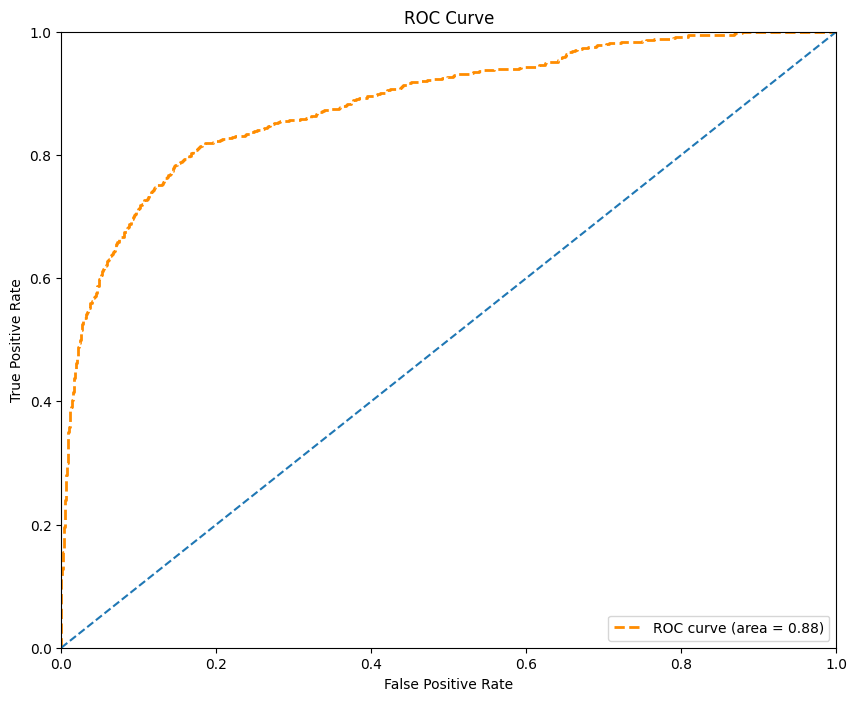

In [58]:

def _plot_roc_curve(fpr, tpr, thres, auc):
    plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.title('ROC Curve')

_plot_roc_curve(fpr, tpr, thres, roc_auc)

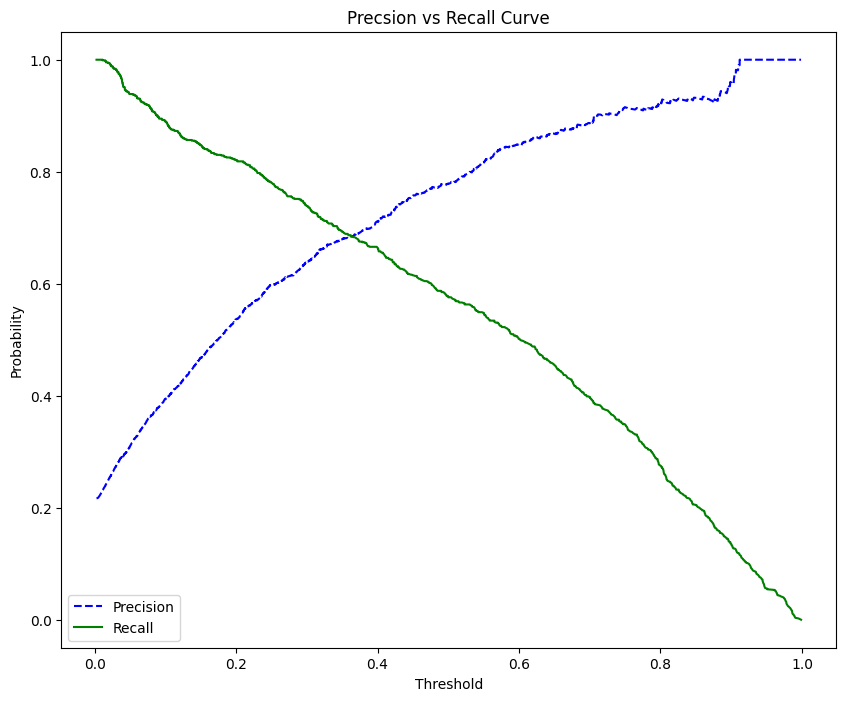

In [59]:
from sklearn.metrics import precision_recall_curve
precision, recall, thres = precision_recall_curve(y_test, y_pred_prob_test)

def _plot_prec_rec_curve(prec, rec, thres):
    plt.figure(figsize = (10, 8))
    plt.plot(thres, prec[:-1], 'b--', label = 'Precision')
    plt.plot(thres, rec[:-1], 'g-', label = 'Recall')
    plt.xlabel('Threshold')
    plt.ylabel('Probability')
    plt.title('Precsion vs Recall Curve')
    plt.legend()

_plot_prec_rec_curve(precision, recall, thres)

In [60]:
def _KM(y_pred, n_bins):
    _, thresholds = pd.qcut(y_pred, q=n_bins, retbins=True)
    cmd_BAD = []
    cmd_GOOD = []
    BAD_id = set(np.where(y_test == 0)[0])
    GOOD_id = set(np.where(y_test == 1)[0])
    total_BAD = len(BAD_id)
    total_GOOD = len(GOOD_id)
    for thres in thresholds:
        pred_id = set(np.where(y_pred <= thres)[0])

        per_BAD = len(pred_id.intersection(BAD_id))/total_BAD
        cmd_BAD.append(per_BAD)

        per_GOOD = len(pred_id.intersection(GOOD_id))/total_GOOD
        cmd_GOOD.append(per_GOOD)
    cmd_BAD = np.array(cmd_BAD)
    cmd_GOOD = np.array(cmd_GOOD)
    return cmd_BAD, cmd_GOOD, thresholds

cmd_BAD, cmd_GOOD, thresholds = _KM(y_pred_prob_test, n_bins=20)

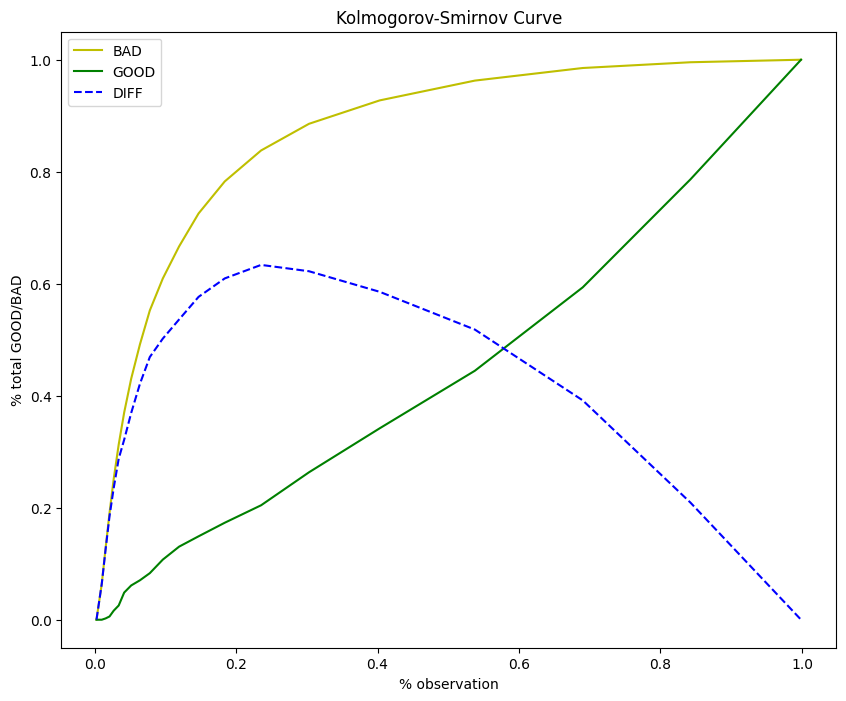

In [61]:
def _plot_KM(cmd_BAD, cmd_GOOD, thresholds):
    plt.figure(figsize = (10, 8))
    plt.plot(thresholds, cmd_BAD, 'y-', label = 'BAD')
    plt.plot(thresholds, cmd_GOOD, 'g-', label = 'GOOD')
    plt.plot(thresholds, cmd_BAD-cmd_GOOD, 'b--', label = 'DIFF')
    plt.xlabel('% observation')
    plt.ylabel('% total GOOD/BAD')
    plt.title('Kolmogorov-Smirnov Curve')
    plt.legend()

_plot_KM(cmd_BAD, cmd_GOOD, thresholds)

In [62]:
from scipy import stats

stats.ks_2samp(cmd_BAD, cmd_GOOD)

KstestResult(statistic=0.5238095238095238, pvalue=0.005467427576534314, statistic_location=0.20438799076212472, statistic_sign=-1)

In [63]:
model = AdaBoostClassifier(n_estimators=150,random_state=0)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
get_evaluation_scores(label = y_test, predictions=predictions)
feat_importances = pd.Series(model.feature_importances_, index=WOE_dict.keys())
feat_importances=pd.DataFrame(feat_importances).reset_index()
feat_importances.columns=['feature_name','feature_importance']
feat_importances=feat_importances.sort_values(['feature_importance'],ascending=False)


#plt.figure(figsize=(15,15))
#sns_plot1=sns.barplot(feat_importances.feature_importance,feat_importances.feature_name,estimator=sum)
#plt.title("Features Importance",size=18)
#plt.ylabel('', size = 15)
#plt.tick_params(labelsize=18)

print(feat_importances)


True Positive： 506
True Negative： 2958
False Positive： 153
False Negative： 360
accuracy:  0.8710082977118431
（recall）:  0.5842956120092379
（precision）:  0.7678300455235205
F1 score:  0.6636065573770491
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      3111
           1       0.77      0.58      0.66       866

    accuracy                           0.87      3977
   macro avg       0.83      0.77      0.79      3977
weighted avg       0.86      0.87      0.86      3977

balanced_accuracy_score:  0.7675576420701926
                  feature_name  feature_importance
9                   loan_grade            0.359887
6          loan_percent_income            0.265612
7        person_home_ownership            0.150932
1                person_income            0.108384
8                  loan_intent            0.066817
4                loan_int_rate            0.024763
3                    loan_amnt            0.010263
0                 

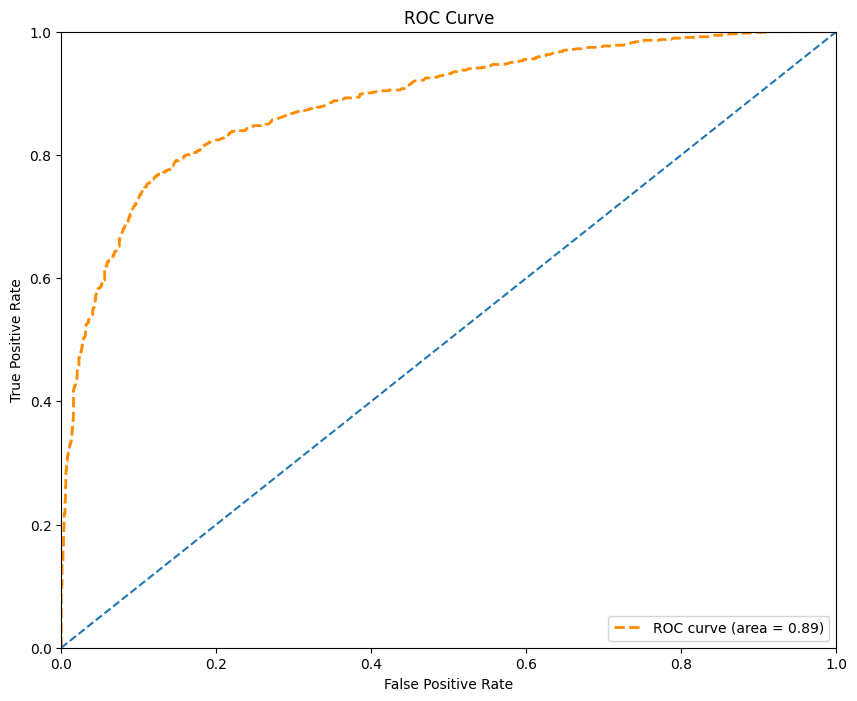

In [64]:
y_pred_prob_test_1 = model.predict_proba(X_test)[:, 1]
fpr_1, tpr_1, thres_1 = roc_curve(y_test, y_pred_prob_test_1)
roc_auc_1 = auc(fpr_1, tpr_1)

def _plot_roc_curve(fpr, tpr, thres, auc):
    plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.title('ROC Curve')

_plot_roc_curve(fpr_1, tpr_1, thres_1, roc_auc_1)

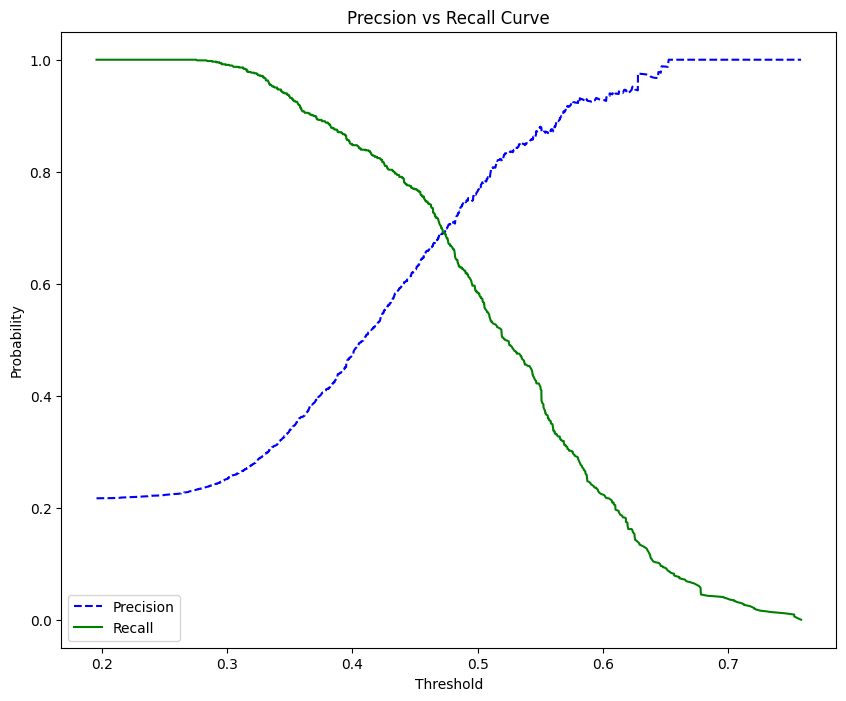

In [65]:
from sklearn.metrics import precision_recall_curve

y_pred_proba_test_1 = model.predict_proba(X_test)[:, 1]
precision, recall, thres = precision_recall_curve(y_test, y_pred_proba_test_1)

def _plot_prec_rec_curve(prec, rec, thres):
    plt.figure(figsize = (10, 8))
    plt.plot(thres, prec[:-1], 'b--', label = 'Precision')
    plt.plot(thres, rec[:-1], 'g-', label = 'Recall')
    plt.xlabel('Threshold')
    plt.ylabel('Probability')
    plt.title('Precsion vs Recall Curve')
    plt.legend()

_plot_prec_rec_curve(precision, recall, thres)

In [66]:
pdo = -50

In [67]:
thres_score = 600

In [68]:
odds = 1/4

In [69]:
factor = pdo/np.log(2)
factor

-72.13475204444818

In [70]:
offset = thres_score - factor*np.log(odds)
offset

500.0

In [71]:
beta = 0.5
alpha = -1
woe=0.15
n=12

In [72]:
score = (beta*woe+alpha/n)*factor+offset/n
score

42.2677896003704

In [73]:
def _CreditScore(beta, alpha, woe, n = 12, odds = 1/4, pdo = -50, thres_score = 600):
    factor = pdo/np.log(2)
    offset = thres_score - factor*np.log(odds)
    score = (beta*woe+alpha/n)*factor+offset/n
    return score

_CreditScore(beta = 0.5, alpha = -1, woe = 0.15, n = 12)

42.2677896003704

In [74]:
dict(zip(list(X_train.columns), logit_model.coef_[0]))

{'person_age_WOE': 0.2409715448445392,
 'person_income_WOE': 0.7823246446541829,
 'person_emp_length_WOE': 0.18109565907603753,
 'loan_amnt_WOE': 0.2565458494266961,
 'loan_int_rate_WOE': 0.10656716949234274,
 'cb_person_cred_hist_length_WOE': 0.10551859853610228,
 'loan_percent_income_WOE': 0.98936432124527,
 'person_home_ownership_WOE': 0.8964432994854659,
 'loan_intent_WOE': 1.2644224373624338,
 'loan_grade_WOE': 1.125386087354003,
 'cb_person_default_on_file_WOE': -0.013452333678028143}

In [75]:
logit_model.intercept_[0]

-1.349214787109636

In [76]:
betas_dict = dict(zip(list(X_train.columns), logit_model.coef_[0]))
alpha = logit_model.intercept_[0]
betas_dict

{'person_age_WOE': 0.2409715448445392,
 'person_income_WOE': 0.7823246446541829,
 'person_emp_length_WOE': 0.18109565907603753,
 'loan_amnt_WOE': 0.2565458494266961,
 'loan_int_rate_WOE': 0.10656716949234274,
 'cb_person_cred_hist_length_WOE': 0.10551859853610228,
 'loan_percent_income_WOE': 0.98936432124527,
 'person_home_ownership_WOE': 0.8964432994854659,
 'loan_intent_WOE': 1.2644224373624338,
 'loan_grade_WOE': 1.125386087354003,
 'cb_person_default_on_file_WOE': -0.013452333678028143}

In [77]:
alpha

-1.349214787109636

In [78]:
WOE_dict[col]['table']['WOE'].to_frame().iterrows()

<generator object DataFrame.iterrows at 0x796c3d14da10>

In [81]:
cols = []
features = []
woes = []
betas = []
scores = []

for col in columns:
    for feature, woe in WOE_dict[col]['table']['WOE'].to_frame().iterrows():
        cols.append(col)
        # Add feature
        feature = str(feature)
        features.append(feature)
        # Add woe
        woe = woe.values[0]
        woes.append(woe)
        # Add beta
        col_woe = col+'_WOE'
        beta = betas_dict[col_woe]
        betas.append(beta)
        # Add score
        score = _CreditScore(beta = beta, alpha = alpha, woe = woe, n = 12)
        scores.append(score)

df_WOE = pd.DataFrame({'Columns': cols, 'Features': features, 'WOE': woes, 'Betas':betas, 'Scores':scores})


In [84]:
print(df_WOE.head(30))


                  Columns                 Features       WOE     Betas  \
0              person_age     (-999999999.0, 22.0]  0.271586  0.240972   
1              person_age             (22.0, 23.0] -0.018387  0.240972   
2              person_age             (23.0, 24.0]  0.034689  0.240972   
3              person_age             (24.0, 25.0] -0.001281  0.240972   
4              person_age             (25.0, 26.0] -0.143529  0.240972   
5              person_age             (26.0, 27.0] -0.031421  0.240972   
6              person_age             (27.0, 29.0] -0.037652  0.240972   
7              person_age             (29.0, 32.0] -0.141639  0.240972   
8              person_age             (32.0, 36.0] -0.132042  0.240972   
9              person_age      (36.0, 999999999.0] -0.052778  0.240972   
10          person_income  (-999999999.0, 28800.0]  1.126677  0.782325   
11          person_income       (28800.0, 35000.0]  0.929964  0.782325   
12          person_income       (35000

In [85]:
print(df_WOE.tail(30))

                       Columns                Features       WOE     Betas  \
49                   loan_amnt      (12000.0, 14700.0]  0.138649  0.256546   
50                   loan_amnt      (14700.0, 19200.0]  0.332900  0.256546   
51                   loan_amnt  (19200.0, 999999999.0]  0.607290  0.256546   
52               loan_int_rate    (-999999999.0, 6.92] -1.127281  0.106567   
53               loan_int_rate            (6.92, 7.74] -0.993396  0.106567   
54               loan_int_rate            (7.74, 9.32] -0.575686  0.106567   
55               loan_int_rate           (9.32, 10.62] -0.431625  0.106567   
56               loan_int_rate         (10.62, 11.017] -0.183039  0.106567   
57               loan_int_rate         (11.017, 11.49] -0.409766  0.106567   
58               loan_int_rate          (11.49, 12.68] -0.252100  0.106567   
59               loan_int_rate          (12.68, 13.61] -0.036013  0.106567   
60               loan_int_rate          (13.61, 15.21]  0.858443

In [86]:
test_obs = data[columns].iloc[0:1, :]
test_obs

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,25,72000,MORTGAGE,4.784432,HOMEIMPROVEMENT,A,2000,7.66,0.03,N,4


In [87]:
def _search_score(obs, col):
    feature = [str(inter) for inter in list(WOE_dict[col]['table'].index) if obs[col].values[0] in inter][0]
    score = df_WOE[(df_WOE['Columns'] == col) & (df_WOE['Features'] == feature)]['Scores'].values[0]
    return score


score = _search_score(test_obs, 'loan_amnt')
score

50.17020745837553

In [88]:
def _total_score(obs, columns = columns):
    scores = dict()
    for col in columns:
        scores[col] = _search_score(obs, col)
    total_score = sum(scores.values())
    return scores, total_score

scores, total_score = _total_score(test_obs)
print('score for each fields: \n', scores)
print('final total score: ', total_score)

score for each fields: 
 {'person_age': 49.79937570027304, 'person_income': 73.3688984122121, 'person_home_ownership': 92.18153715104833, 'person_emp_length': 49.925686629254415, 'loan_intent': 30.60778595771774, 'loan_grade': 122.04645235216043, 'loan_amnt': 50.17020745837553, 'loan_int_rate': 57.413533867045096, 'loan_percent_income': 112.39326074131489, 'cb_person_default_on_file': 49.56325168702929, 'cb_person_cred_hist_length': 49.39057194940556}
final total score:  736.8605619058363


In [89]:
scores_table_final = pd.DataFrame.from_dict([scores]).T.reset_index()
scores_table_final.columns = ['Features', 'Credit Score']
scores_table_final

,Features,Credit Score
0,person_age,49.799376
1,person_income,73.368898
2,person_home_ownership,92.181537
3,person_emp_length,49.925687
4,loan_intent,30.607786
5,loan_grade,122.046452
6,loan_amnt,50.170207
7,loan_int_rate,57.413534
8,loan_percent_income,112.393261
9,cb_person_default_on_file,49.563252


In [90]:
total_scores = []
for i in np.arange(data[columns].shape[0]):
    obs = data[columns].iloc[i:(i+1), :]
    _, score = _total_score(obs)
    total_scores.append(score)
data['Score'] = total_scores
data.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,...,person_emp_length_WOE,loan_amnt_WOE,loan_int_rate_WOE,cb_person_cred_hist_length_WOE,loan_percent_income_WOE,person_home_ownership_WOE,loan_intent_WOE,loan_grade_WOE,cb_person_default_on_file_WOE,Score
0,25,72000,MORTGAGE,4.784432,HOMEIMPROVEMENT,A,2000,7.660000,0,0.03,...,-0.011374,-0.021242,-0.993396,0.050783,-0.877376,-0.655758,0.210170,-0.890242,-0.220382,736.860562
1,26,32000,RENT,4.000000,DEBTCONSOLIDATION,A,12250,11.016532,1,0.38,...,-0.011374,0.138649,-0.183039,0.068992,2.168064,0.503276,0.376072,-0.890242,-0.220382,346.508059
2,25,34000,MORTGAGE,2.000000,HOMEIMPROVEMENT,C,5800,13.480000,1,0.17,...,0.079446,-0.424418,-0.036013,0.068992,-0.281458,-0.655758,0.210170,-0.067700,0.801479,551.253740
3,25,118000,MORTGAGE,8.000000,HOMEIMPROVEMENT,A,15000,7.880000,0,0.13,...,-0.193215,0.332900,-0.575686,0.050783,-0.632246,-0.655758,0.210170,-0.890242,-0.220382,744.260750
4,22,96000,MORTGAGE,6.000000,EDUCATION,C,6000,13.490000,0,0.06,...,-0.193215,-0.424418,-0.036013,0.068992,-0.664628,-0.655758,-0.329343,-0.067700,-0.220382,735.593426


Text(0.5, 1.0, 'Distribution Score in Default vs Non-Default')

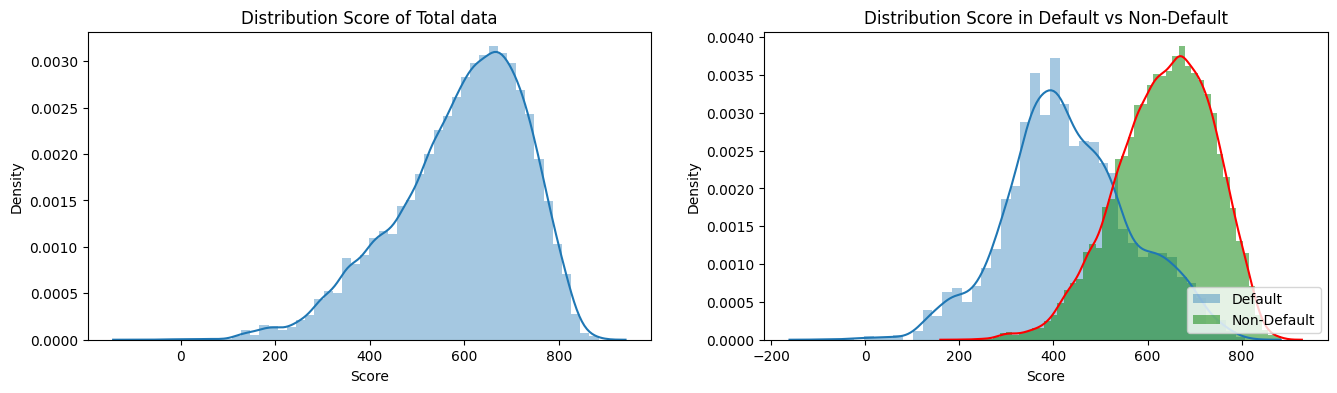

In [91]:
plt.figure(figsize=(16, 4))
plt.subplot(121)
sns.distplot(data['Score'])
plt.title('Distribution Score of Total data')
plt.subplot(122)
sns.distplot(data[data['loan_status']==1]['Score'], label='Default')
sns.distplot(data[data['loan_status']==0]['Score'], label='Non-Default',
             kde_kws={"color": "r"},
             hist_kws={"color": "g", "alpha":0.5})
plt.legend(loc = 'lower right')
plt.title('Distribution Score in Default vs Non-Default')